In [1]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error
print(os.listdir("./input"))

['GOOGL_2006-01-01_to_2018-01-01.csv']


In [3]:
google = pd.read_csv('./input/GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
google.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


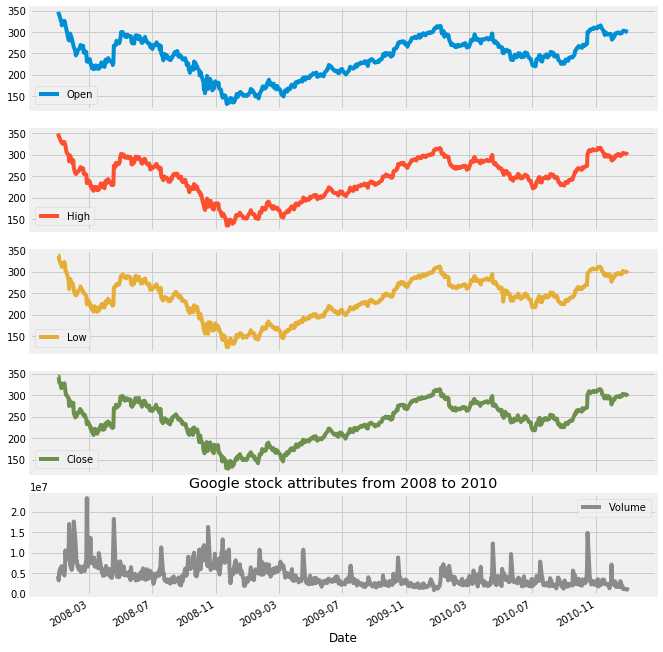

In [4]:
google['2008':'2010'].plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2010')
plt.savefig('stocks.png')
plt.show()

In [6]:
timestamp =pd.Timestamp(2017,1,1,12)
timestamp

Timestamp('2017-01-01 12:00:00')

In [7]:
period =pd.Period('2017-01-01')
period

Period('2017-01-01', 'D')

In [8]:
period.start_time < timestamp < period.end_time

True

In [9]:
new_period=timestamp.to_period(freq='H')
new_period

Period('2017-01-01 12:00', 'H')

In [10]:
# Converting period to timestamp
new_timestamp = period.to_timestamp(freq='H', how='start')
new_timestamp

Timestamp('2017-01-01 00:00:00')

In [11]:
dr1 = pd.date_range(start='1/1/18', end='1/31/18')
dr1

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12',
               '2018-01-13', '2018-01-14', '2018-01-15', '2018-01-16',
               '2018-01-17', '2018-01-18', '2018-01-19', '2018-01-20',
               '2018-01-21', '2018-01-22', '2018-01-23', '2018-01-24',
               '2018-01-25', '2018-01-26', '2018-01-27', '2018-01-28',
               '2018-01-29', '2018-01-30', '2018-01-31'],
              dtype='datetime64[ns]', freq='D')

In [12]:
dr2  = pd.date_range(start='1/1/18', end='1/1/19',freq='M')
dr2

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

In [13]:
dr3=pd.date_range(end='1/4/2014', periods=8)
dr3

DatetimeIndex(['2013-12-28', '2013-12-29', '2013-12-30', '2013-12-31',
               '2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04'],
              dtype='datetime64[ns]', freq='D')

In [14]:
dr4 = pd.date_range(start='2013-04-24', end='2014-11-27', periods=3)
dr4

DatetimeIndex(['2013-04-24', '2014-02-09', '2014-11-27'], dtype='datetime64[ns]', freq=None)

In [15]:
df = pd.DataFrame({'year': [2015, 2016], 'month': [2, 3], 'day': [4, 5]})
df

,day,month,year
0,4,2,2015
1,5,3,2016


In [16]:
df=pd.to_datetime(df)
df

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [17]:
df=pd.to_datetime('01-01-2017')
df

Timestamp('2017-01-01 00:00:00')

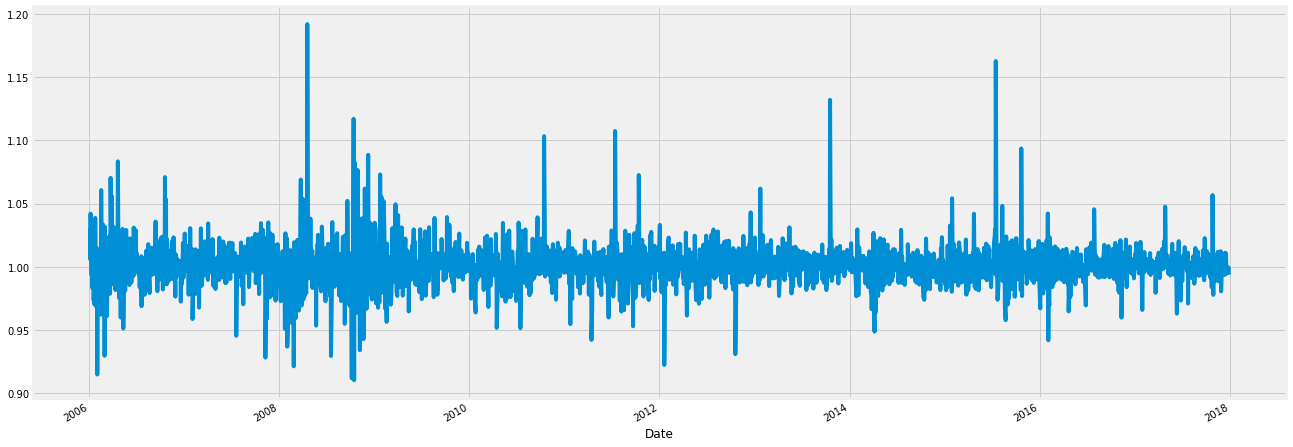

In [18]:
google['Change'] = google.High.div(google.High.shift())
google['Change'].plot(figsize=(20,8))

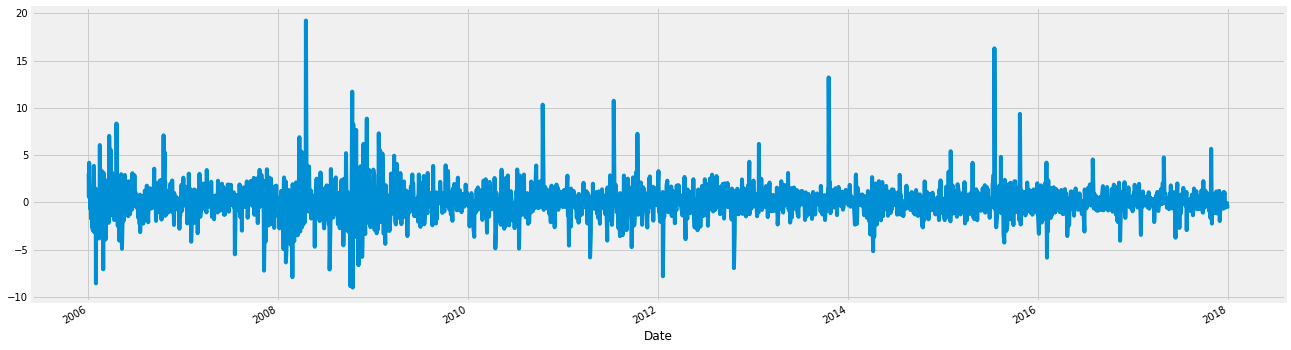

In [20]:
google.High.pct_change().mul(100).plot(figsize=(20,6))

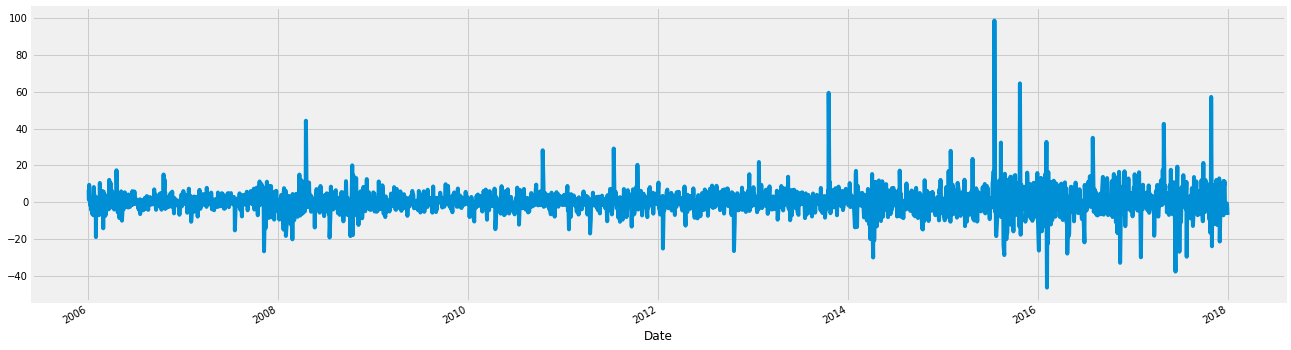

In [23]:
google.High.diff().plot(figsize=(20,6))

In [25]:
cat =pd.read_csv('./input/CAT_2006-01-01_to_2018-01-01.csv',index_col='Date',parse_dates=['Date'])

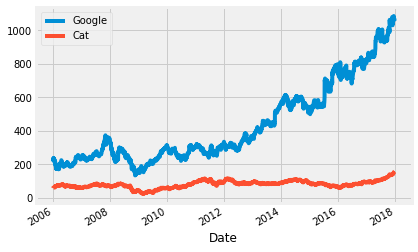

In [26]:
google.High.plot()
cat.High.plot()
plt.legend(['Google','Cat'])
plt.show()

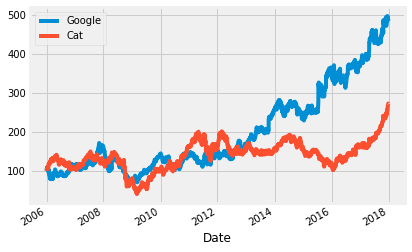

In [27]:
#iloc 행과 열 추출
normalized_google = google.High.div(google.High.iloc[0]).mul(100)
normalized_cat= cat.High.div(cat.High.iloc[0]).mul(100)
normalized_google.plot()
normalized_cat.plot()
plt.legend(['Google','Cat'])
plt.show()

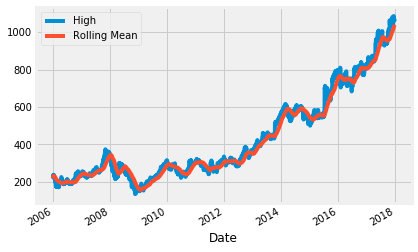

In [29]:
rolling_google=google.High.rolling('90D').mean()
google.High.plot()
rolling_google.plot()
plt.legend(['High','Rolling Mean'])
plt.show()

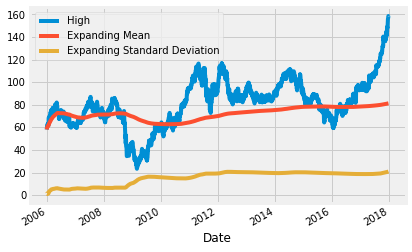

In [31]:
cat_mean = cat.High.expanding().mean()
cat_std=cat.High.expanding().std()
cat.High.plot()
cat_mean.plot()
cat_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.show()

In [32]:
# OHLC chart of June 2008
trace = go.Ohlc(x=google['06-2008'].index,
                open=google['06-2008'].Open,
                high=google['06-2008'].High,
                low=google['06-2008'].Low,
                close=google['06-2008'].Close)
data = [trace]
iplot(data, filename='simple_ohlc')

In [33]:
# OHLC chart of 2008
trace = go.Ohlc(x=google['2008'].index,
                open=google['2008'].Open,
                high=google['2008'].High,
                low=google['2008'].Low,
                close=google['2008'].Close)
data = [trace]
iplot(data, filename='simple_ohlc')

In [34]:
# OHLC chart of 2008
trace = go.Ohlc(x=google.index,
                open=google.Open,
                high=google.High,
                low=google.Low,
                close=google.Close)
data = [trace]
iplot(data, filename='simple_ohlc')

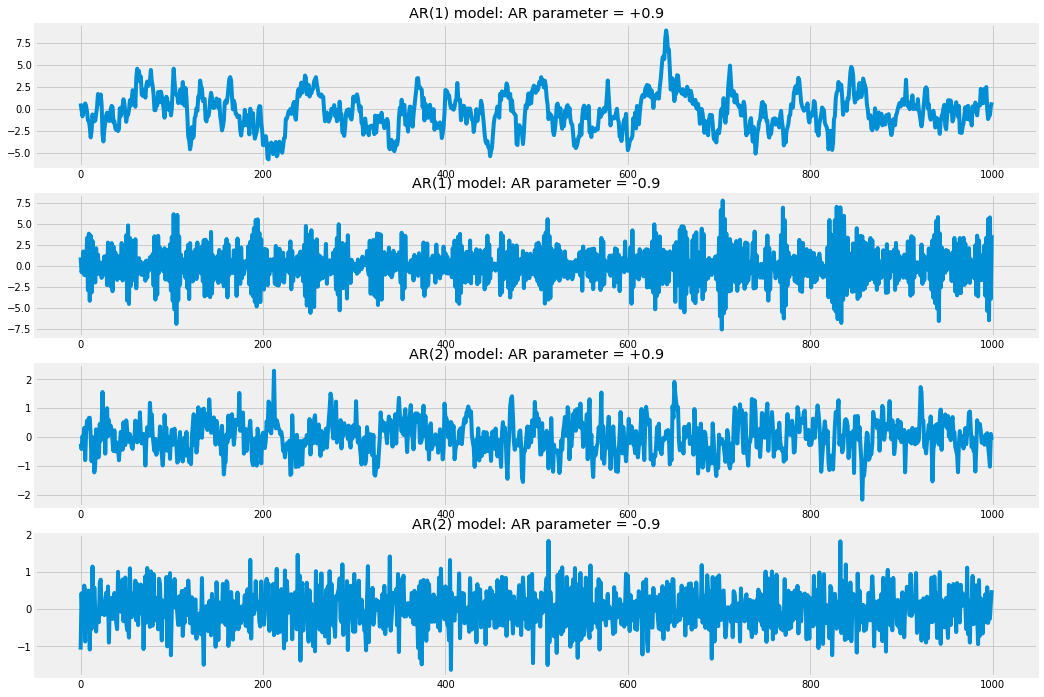

In [35]:
# AR(1) MA(1) model:AR parameter = +0.9
rcParams['figure.figsize'] = 16, 12
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)
# We will take care of MA model later
# AR(1) MA(1) AR parameter = -0.9
plt.subplot(4,1,2)
ar2 = np.array([1, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = -0.9')
plt.plot(sim2)
# AR(2) MA(1) AR parameter = 0.9
plt.subplot(4,1,3)
ar3 = np.array([2, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = +0.9')
plt.plot(sim3)
# AR(2) MA(1) AR parameter = -0.9
plt.subplot(4,1,4)
ar4 = np.array([2, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = -0.9')
plt.plot(sim4)
plt.show()

In [36]:
model = ARMA(sim1, order=(1,0))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1398.708
Method:                       css-mle   S.D. of innovations              0.979
Date:                Mon, 22 Jul 2019   AIC                           2803.416
Time:                        15:00:43   BIC                           2818.139
Sample:                             0   HQIC                          2809.011
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2391      0.261     -0.917      0.359      -0.750       0.272
ar.L1.y        0.8821      0.015     59.594      0.000       0.853       0.911
                                    Roots           

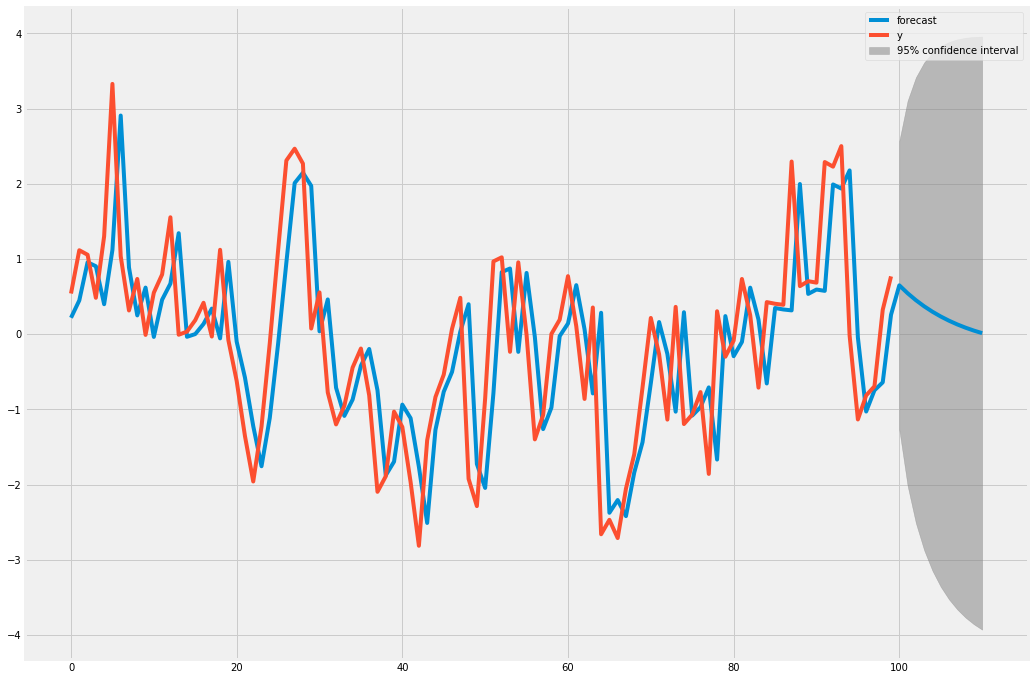

In [37]:
# Predicting simulated AR(1) model 
result.plot_predict(start=900, end=1010)
plt.show()

In [38]:
rmse = math.sqrt(mean_squared_error(sim1[900:1011], result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 0.9746605871138982.


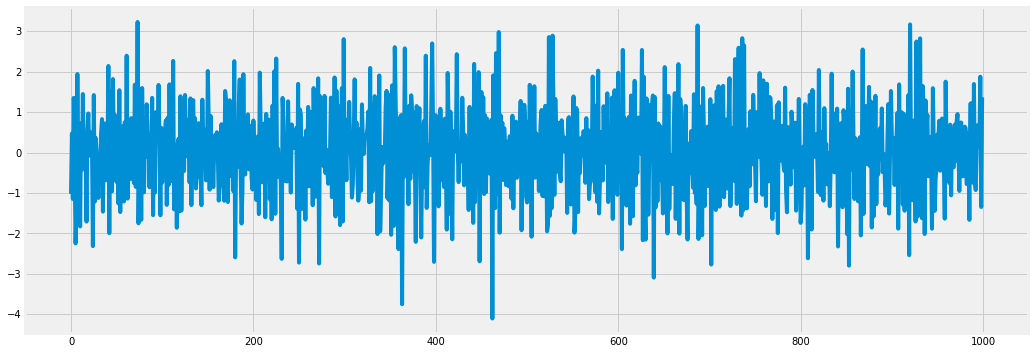

In [39]:
rcParams['figure.figsize'] = 16, 6
ar1 = np.array([1])
ma1 = np.array([1, -0.5])
MA1 = ArmaProcess(ar1, ma1)
sim1 = MA1.generate_sample(nsample=1000)
plt.plot(sim1)

In [40]:
model = ARMA(sim1, order=(0,1))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1422.814
Method:                       css-mle   S.D. of innovations              1.004
Date:                Mon, 22 Jul 2019   AIC                           2851.628
Time:                        15:01:42   BIC                           2866.351
Sample:                             0   HQIC                          2857.223
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0249      0.016      1.589      0.112      -0.006       0.056
ma.L1.y       -0.5066      0.029    -17.675      0.000      -0.563      -0.450
                                    Roots           

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3019
Model:                     ARMA(3, 3)   Log Likelihood              -49407.611
Method:                       css-mle   S.D. of innovations        3098249.632
Date:                Mon, 22 Jul 2019   AIC                          98831.222
Time:                        15:02:30   BIC                          98879.324
Sample:                             0   HQIC                         98848.519
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -358.1839   3492.777     -0.103      0.918   -7203.900    6487.532
ar.L1.y        0.1989      0.165      1.206      0.228      -0.124       0.522
ar.L2.y        0.8714      0.185      4.719      0.0

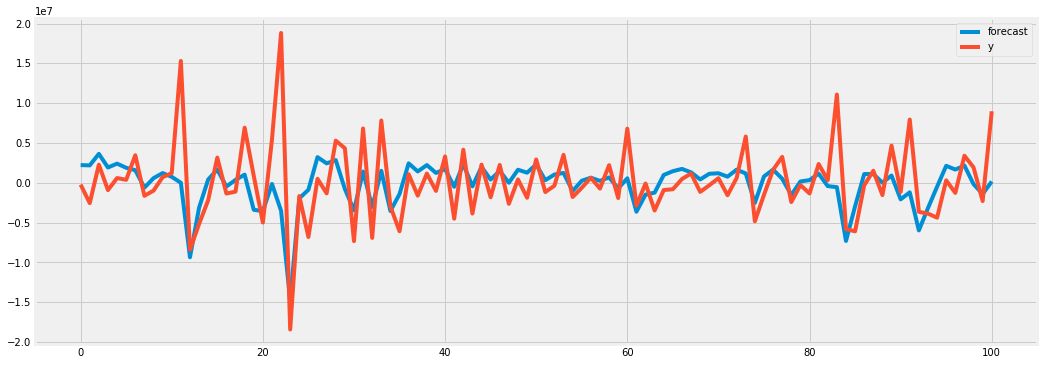

In [43]:
# Forecasting and predicting microsoft stocks volume
model = ARMA(cat["Volume"].diff().iloc[1:].values, order=(3,3))
result = model.fit()
print(result.summary())
print("μ={}, ϕ={}, θ={}".format(result.params[0],result.params[1],result.params[2]))
result.plot_predict(start=1000, end=1100)
plt.show()

In [44]:
rmse = math.sqrt(mean_squared_error(cat["Volume"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 6615433.520107033.


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 3018
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -50436.186
Method:                       css-mle   S.D. of innovations        4380660.457
Date:                Mon, 22 Jul 2019   AIC                         100880.372
Time:                        15:03:23   BIC                         100904.421
Sample:                             1   HQIC                        100889.020
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -771.2416   3.48e+04     -0.022      0.982    -6.9e+04    6.74e+04
ar.L1.D.y     -0.8559      0.016    -52.270      0.000      -0.888      -0.824
ar.L2.D.y     -0.4361      0.016    -26.639      0.0

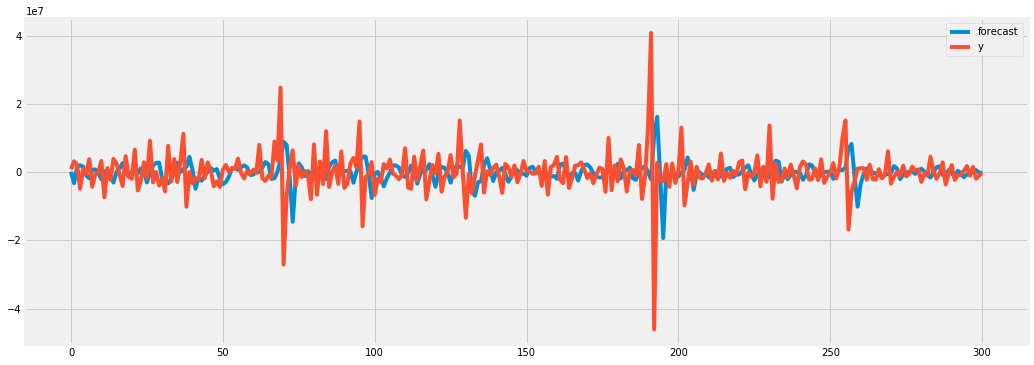

In [45]:
# Predicting the microsoft stocks volume
rcParams['figure.figsize'] = 16, 6
model = ARIMA(cat["Volume"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())
result.plot_predict(start=700, end=1000)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 3018
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -50436.186
Method:                       css-mle   S.D. of innovations        4380660.457
Date:                Mon, 22 Jul 2019   AIC                         100880.372
Time:                        15:04:06   BIC                         100904.421
Sample:                             1   HQIC                        100889.020
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -771.2416   3.48e+04     -0.022      0.982    -6.9e+04    6.74e+04
ar.L1.D.y     -0.8559      0.016    -52.270      0.000      -0.888      -0.824
ar.L2.D.y     -0.4361      0.016    -26.639      0.0

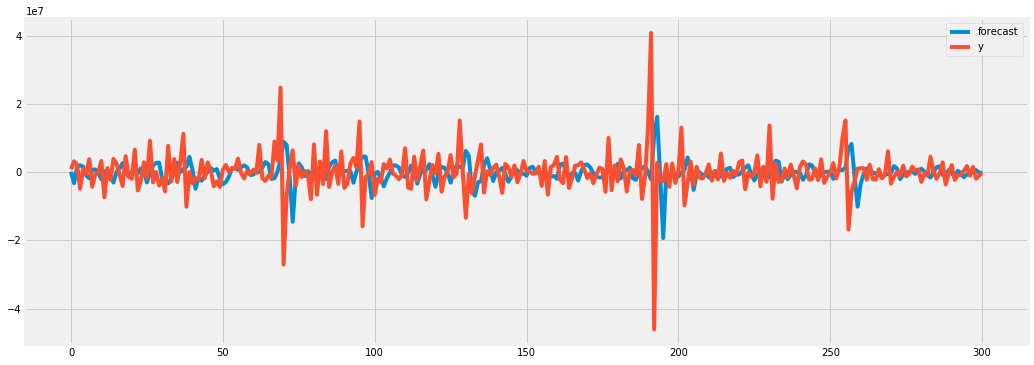

In [46]:
# Predicting the microsoft stocks volume
rcParams['figure.figsize'] = 16, 6
model = ARIMA(cat["Volume"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())
result.plot_predict(start=700, end=1000)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 3018
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -50436.186
Method:                       css-mle   S.D. of innovations        4380660.457
Date:                Mon, 22 Jul 2019   AIC                         100880.372
Time:                        15:04:14   BIC                         100904.421
Sample:                             1   HQIC                        100889.020
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -771.2416   3.48e+04     -0.022      0.982    -6.9e+04    6.74e+04
ar.L1.D.y     -0.8559      0.016    -52.270      0.000      -0.888      -0.824
ar.L2.D.y     -0.4361      0.016    -26.639      0.0

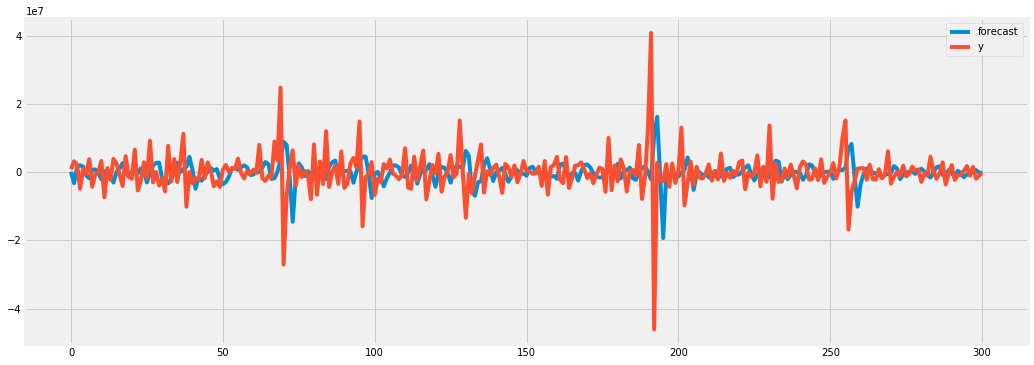

In [48]:
# Predicting the microsoft stocks volume
rcParams['figure.figsize'] = 16, 6
model = ARIMA(cat["Volume"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())
result.plot_predict(start=700, end=1000)
plt.show()

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 3018
Model:               SARIMAX(4, 0, 4)   Log Likelihood              -10096.943
Date:                Mon, 22 Jul 2019   AIC                          20213.887
Time:                        15:04:37   BIC                          20274.010
Sample:                             0   HQIC                         20235.506
                               - 3018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1182      0.050      2.378      0.017       0.021       0.216
ar.L1          0.1915      0.006     31.680      0.000       0.180       0.203
ar.L2          1.1890      0.005    218.186      0.0

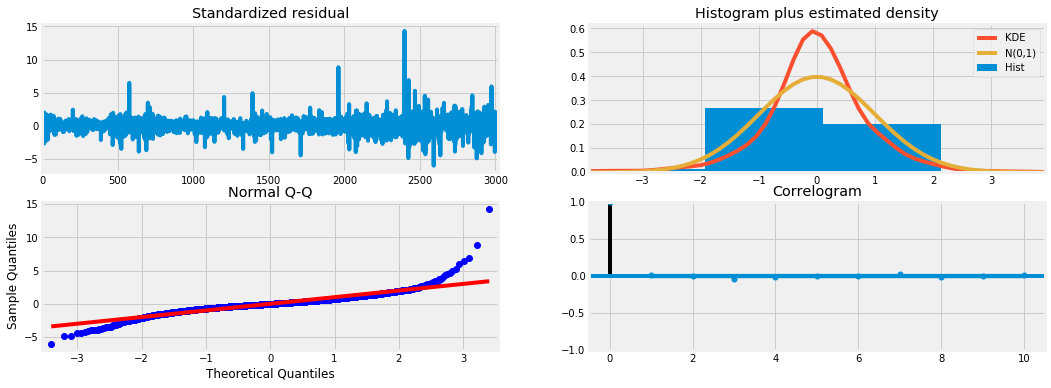

In [49]:
# Predicting closing price of Google'
train_sample = google["Close"].diff().iloc[1:].values
model = sm.tsa.SARIMAX(train_sample,order=(4,0,4),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

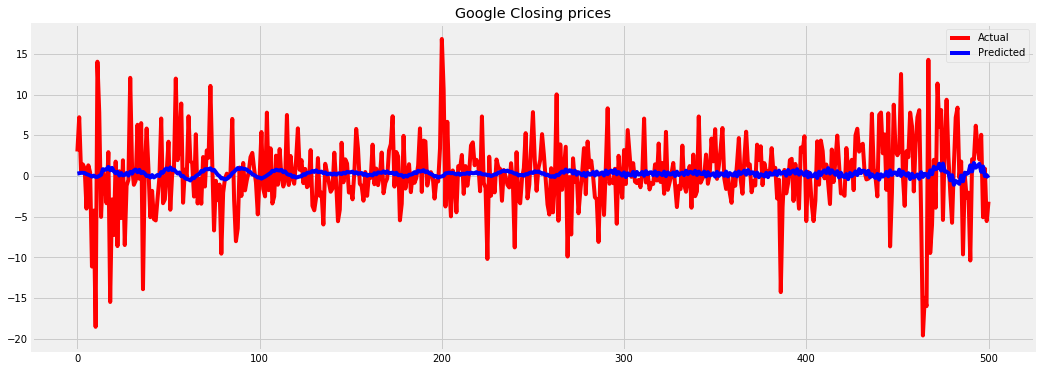

In [50]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Google Closing prices')
plt.show()

                        Unobserved Components Results                         
Dep. Variable:                      y   No. Observations:                 3018
Model:                    local level   Log Likelihood              -10116.511
Date:                Mon, 22 Jul 2019   AIC                          20237.023
Time:                        15:04:47   BIC                          20249.047
Sample:                             0   HQIC                         20241.346
                               - 3018                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular    47.7219      0.384    124.248      0.000      46.969      48.475
sigma2.level      5.033e-05      0.000      0.458      0.647      -0.000       0.000
Ljung-Box (Q):              

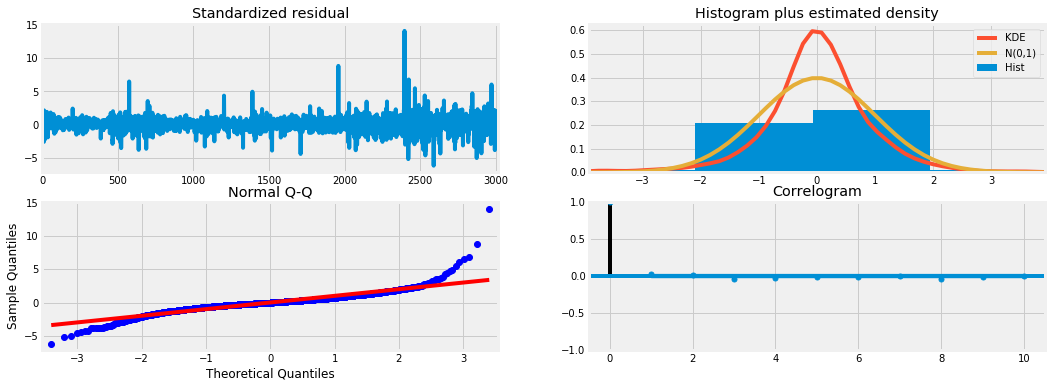

In [51]:
# Predicting closing price of Google'
train_sample = google["Close"].diff().iloc[1:].values
model = sm.tsa.UnobservedComponents(train_sample,'local level')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

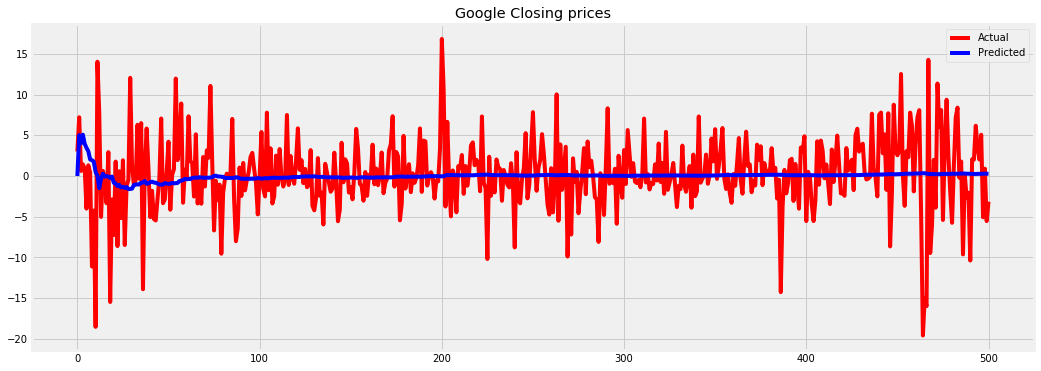

In [52]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Google Closing prices')
plt.show()